In [16]:
import CoolProp 
from CoolProp.CoolProp import PropsSI
import pandas as pd
import numpy as np
import glob,sys,socket,fileinput
import os.path
import matplotlib.pyplot as plt

In [17]:
D=50/1000 #Diametro de la parte cilindrica [m]
T=273.15+26
rho=PropsSI('D', 'T',T , 'P', 1e5, 'AIR') #Densidad del aire [kg/m3]
mu=PropsSI('V', 'T', T, 'P', 1e5, 'AIR') #Viscocidad del aire [Pa. s]
L=0.175*2 #Largo del cilindro en metros
A=D*L ## area proyectada

In [18]:
# en calibrationData va el nombre del archivo que 
CDfile = "CD.txt"
CDData=open(CDfile,"w")
#CDData.write('txt,Media Lift,Media Drag,STD Lift,STD Drag\n');
CDData.write('txt,MediaLift,MediaDrag\n');

In [19]:
VelocityFile = "Velocidades Calibradas/Velocidades.txt"
VelocityData = pd.read_csv(VelocityFile)
PolinomioVelocidad=np.polyfit(VelocityData["V [V]"],VelocityData["U [m/s]"],1)

In [20]:
RawDataFolder = "Raw Data/"
files = np.sort(glob.glob(RawDataFolder+'*.txt'))
VoltajeMedicion=[]
VelocidadMedicion=[]
ReMedicion=[]
for i in files:
    item=i.strip("Raw Data\\V")
    item=item.strip(".txt")
    item=item.strip("")
    VoltajeMedicion.append(float(item))
    Vitem=PolinomioVelocidad[0]*float(item)+PolinomioVelocidad[1]
    VelocidadMedicion.append(Vitem)
    ReMedicion.append(Vitem*D*rho/mu)

In [21]:
Inicial= {
    "Voltaje" : VoltajeMedicion,
    "Velocidad" : VelocidadMedicion,
    "Re" : ReMedicion,
    }
DFInicial = pd.DataFrame(Inicial)
DFInicial

,Voltaje,Velocidad,Re
0,0.00,-0.120047,-378.033360
1,11.12,0.897505,2826.292037
2,15.65,1.312029,4131.651214
3,22.24,1.915057,6030.617435
4,27.76,2.420172,7621.253783
5,33.96,2.987512,9407.838087
6,38.40,3.393801,10687.262976
7,40.40,3.576813,11263.580494
8,42.20,3.741525,11782.266259
9,45.80,4.070948,12819.637791


Raw Data\V00.00.txt
Raw Data\V11.12.txt
Raw Data\V15.65.txt
Raw Data\V22.24.txt
Raw Data\V27.76.txt
Raw Data\V33.96.txt
Raw Data\V38.40.txt
Raw Data\V40.40.txt
Raw Data\V42.20.txt
Raw Data\V45.80.txt
Raw Data\V49.7.txt


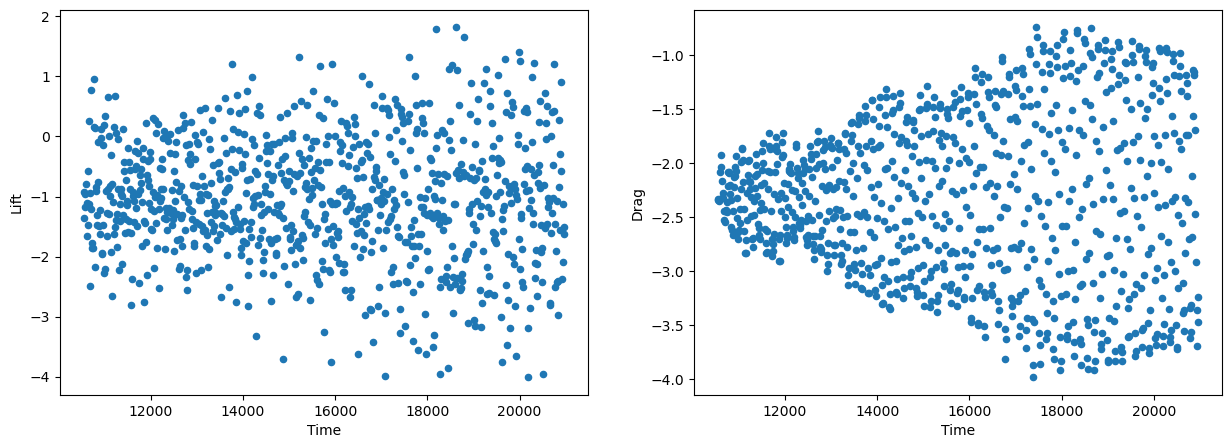

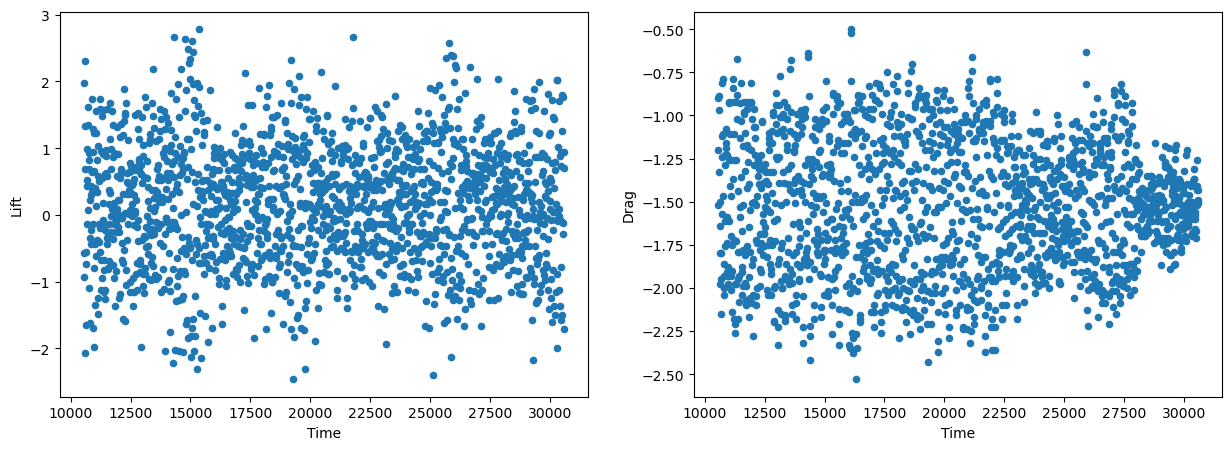

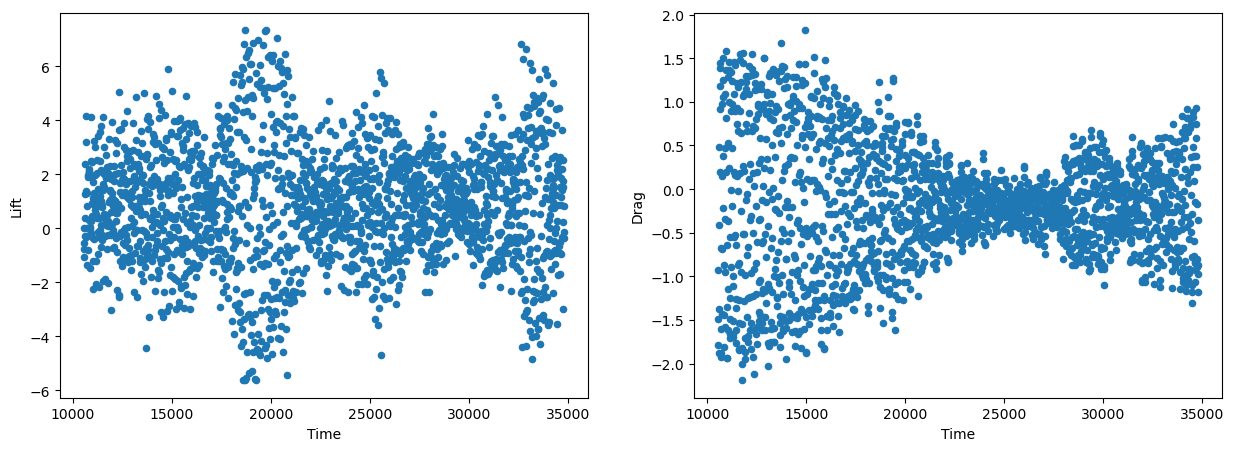

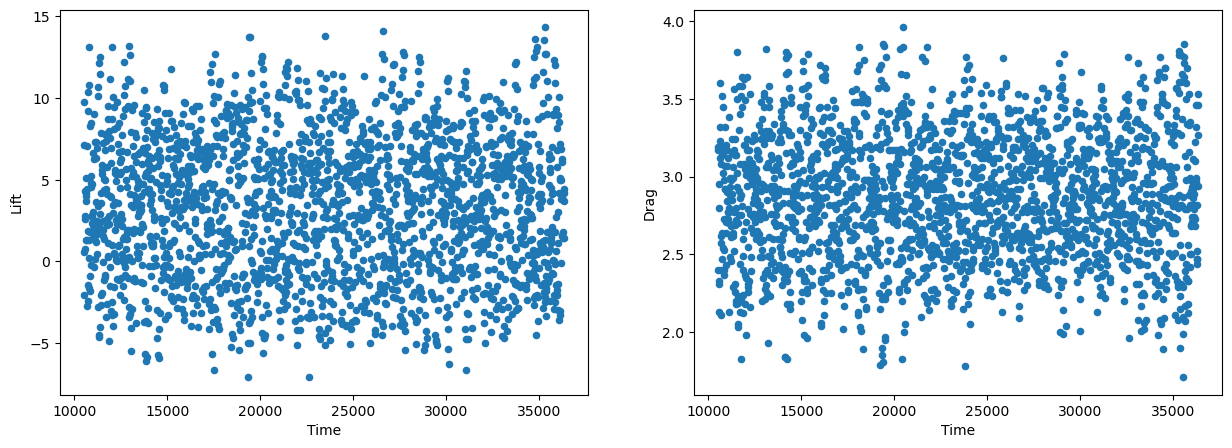

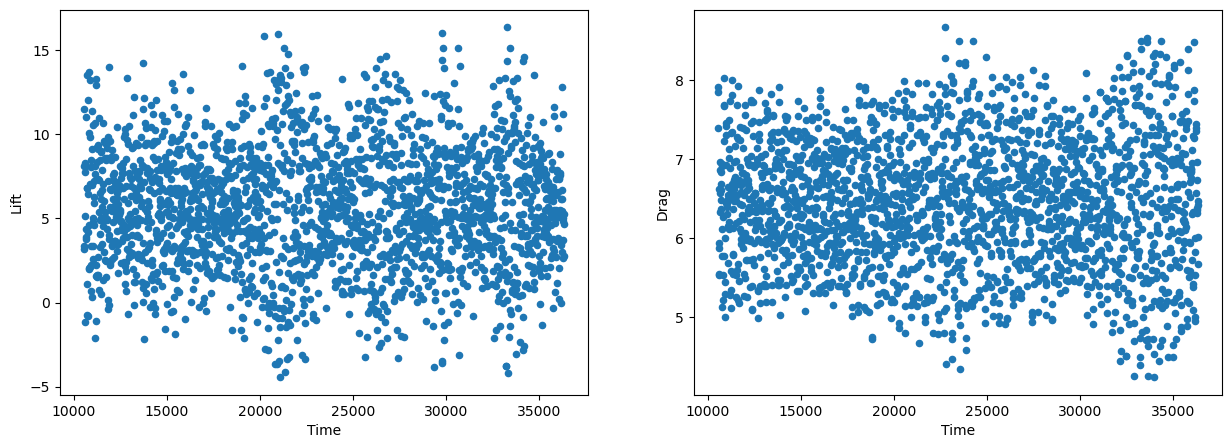

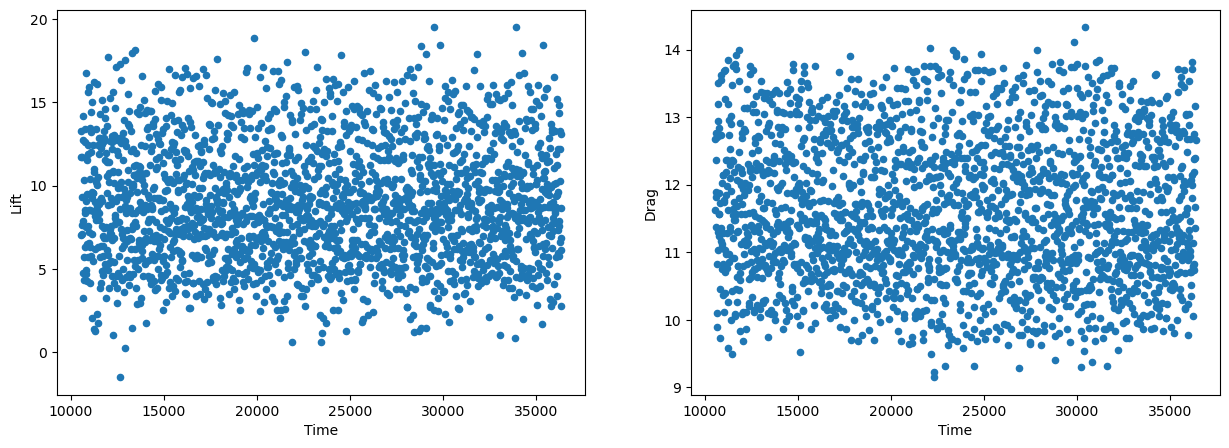

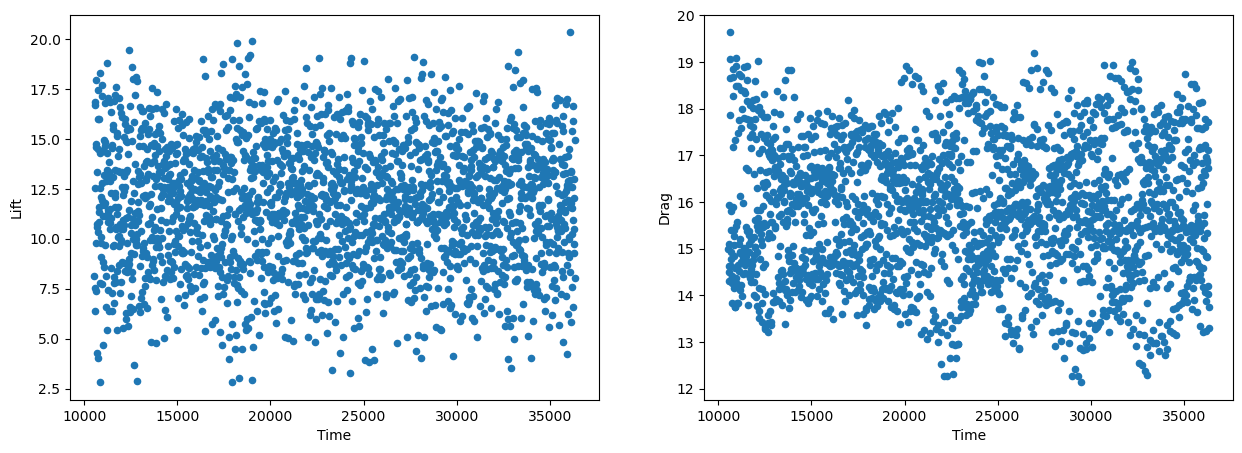

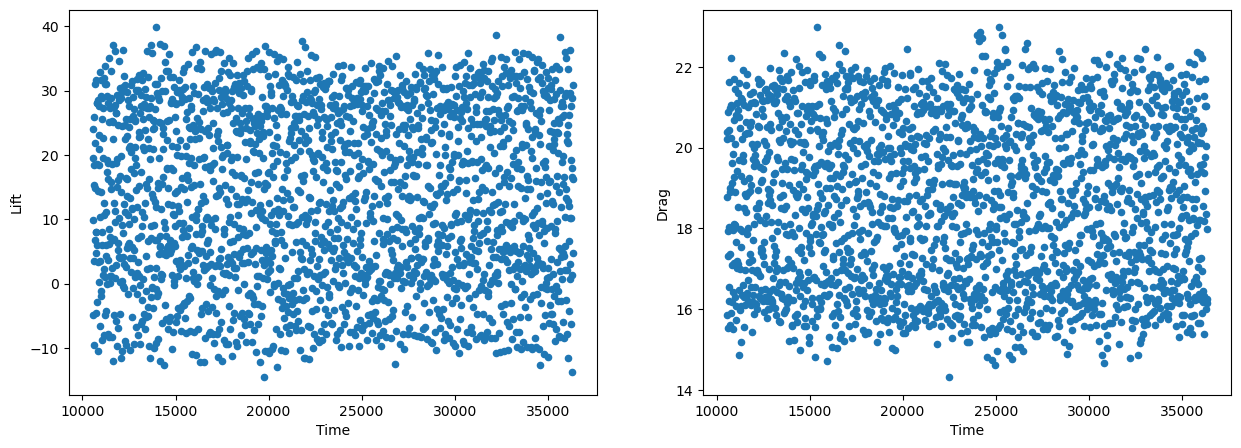

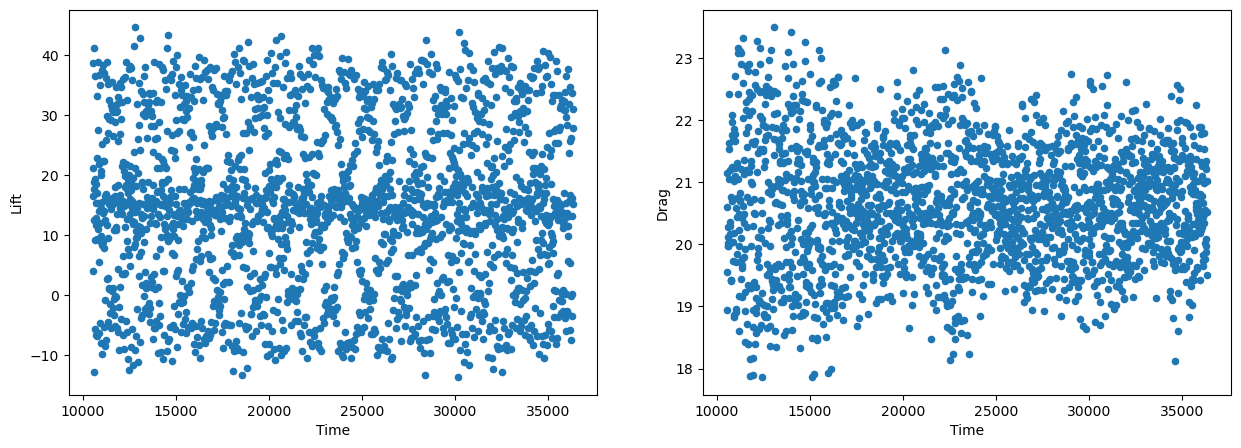

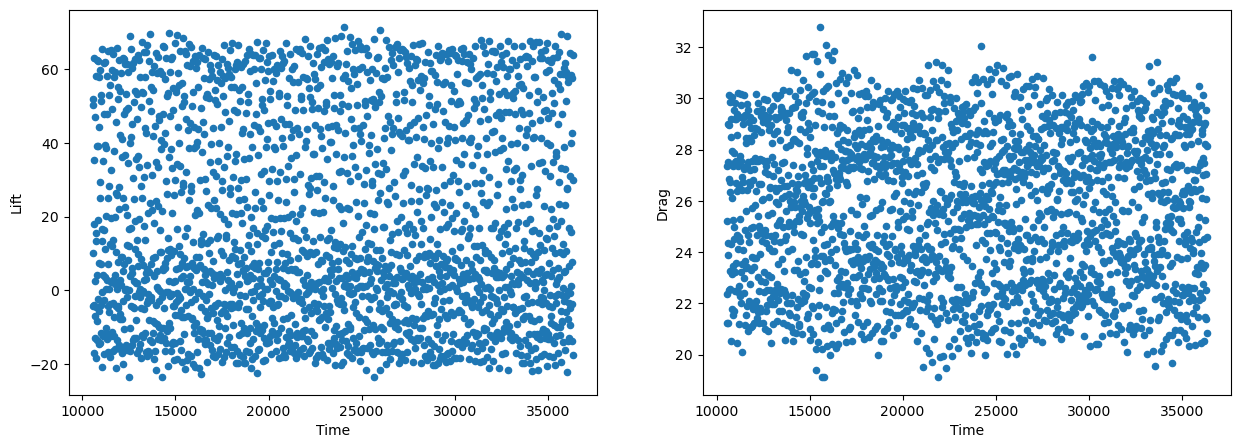

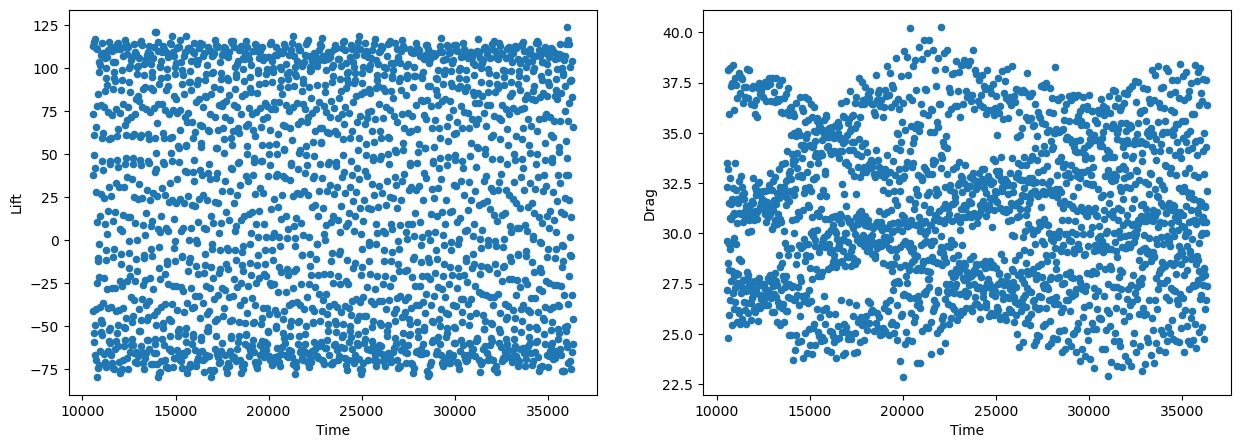

In [22]:
for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos[:-100]
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    datos=datos[800:3000]
    mediaLift=datos["Lift"].mean()
    stdLift=datos["Lift"].std()
    mediaDrag=(datos["Drag"].mean())
    stdDrag=(datos["Drag"].std())
    df=datos
    
 
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+3*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-3*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+3*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-3*stdDrag):
            df["Drag"][i]=np.nan
    mediaLift=datos["Lift"].mean()
    stdLift=datos["Lift"].std()
    mediaDrag=datos["Drag"].mean()
    stdDrag=datos["Drag"].std()   
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+3*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-3*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+3*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-3*stdDrag):
            df["Drag"][i]=np.nan
    mediaLift=datos["Lift"].mean()
    stdLift=datos["Lift"].std()
    mediaDrag=datos["Drag"].mean()
    stdDrag=datos["Drag"].std()
    
    df.interpolate(method ='linear', limit_direction ='backward', inplace=True)

    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    df.plot.scatter(ax=axes[0],x="Time", y="Lift")
    df.plot.scatter(ax=axes[1],x="Time", y="Drag")
    fig.savefig(k+".png", dpi=100)
    print(k)
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    #CDData.write(i+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
    CDData.write(str(k)+","+str(mediaLift)+","+str(mediaDrag)+"\n")


In [23]:
CDData.close()
DFFinal=pd.read_csv(CDfile)
DFFinal

,txt,MediaLift,MediaDrag
0,Raw Data\V00.00.txt,-1.049616,-2.335180
1,Raw Data\V11.12.txt,0.161345,-1.532504
2,Raw Data\V15.65.txt,0.874569,-0.196489
3,Raw Data\V22.24.txt,3.313080,2.871460
4,Raw Data\V27.76.txt,5.628567,6.443541
5,Raw Data\V33.96.txt,8.985391,11.619391
6,Raw Data\V38.40.txt,11.743661,15.811574
7,Raw Data\V40.40.txt,13.416371,18.613273
8,Raw Data\V42.20.txt,14.829877,20.624763
9,Raw Data\V45.80.txt,17.982232,25.657505


,txt,MediaLift,MediaDrag
0,Raw Dataa\V00.00.txt,-412.933009,25.260933
1,Raw Dataa\V11.00.txt,-412.588571,25.707955
2,Raw Dataa\V16.00.txt,-412.283092,26.132336
3,Raw Dataa\V22.00.txt,-411.700587,27.155939
4,Raw Dataa\V28.00.txt,-410.765181,28.082687
5,Raw Dataa\V34.00.txt,-410.115428,29.460035
6,Raw Dataa\V38.00.txt,-409.326288,30.700110
7,Raw Dataa\V40.00.txt,-408.866015,31.258417
8,Raw Dataa\V42.00.txt,-408.369127,32.291418
9,Raw Dataa\V46.00.txt,-407.432113,33.661365


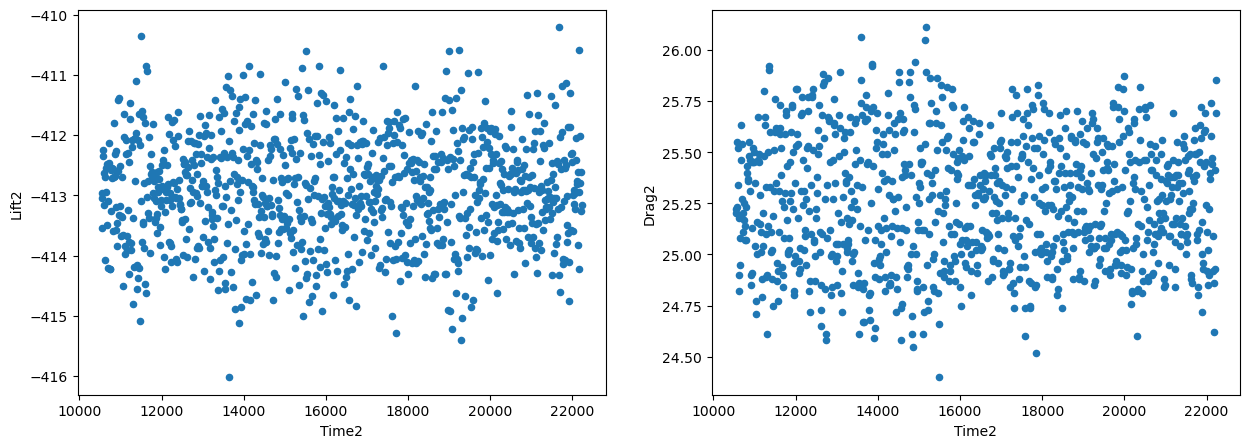

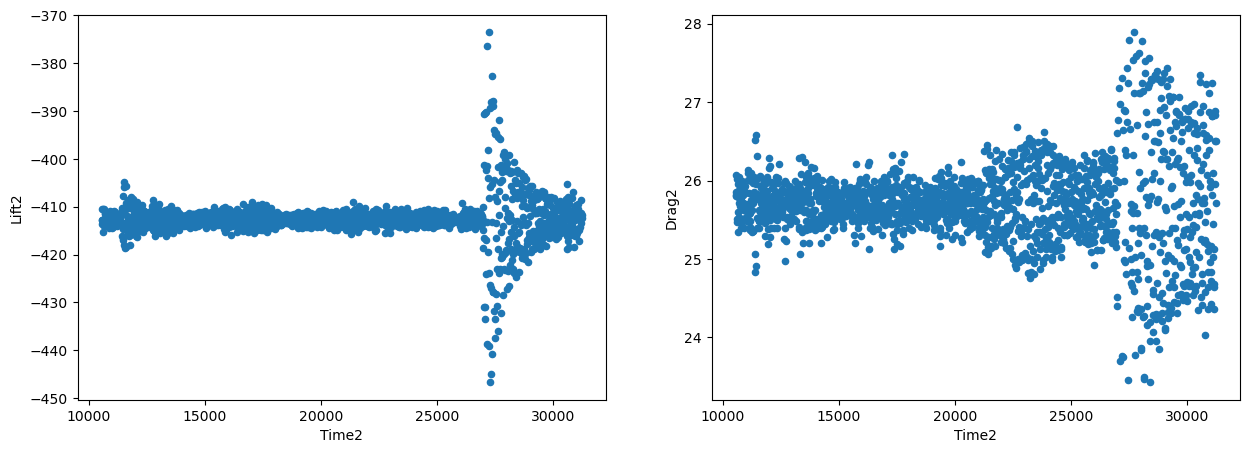

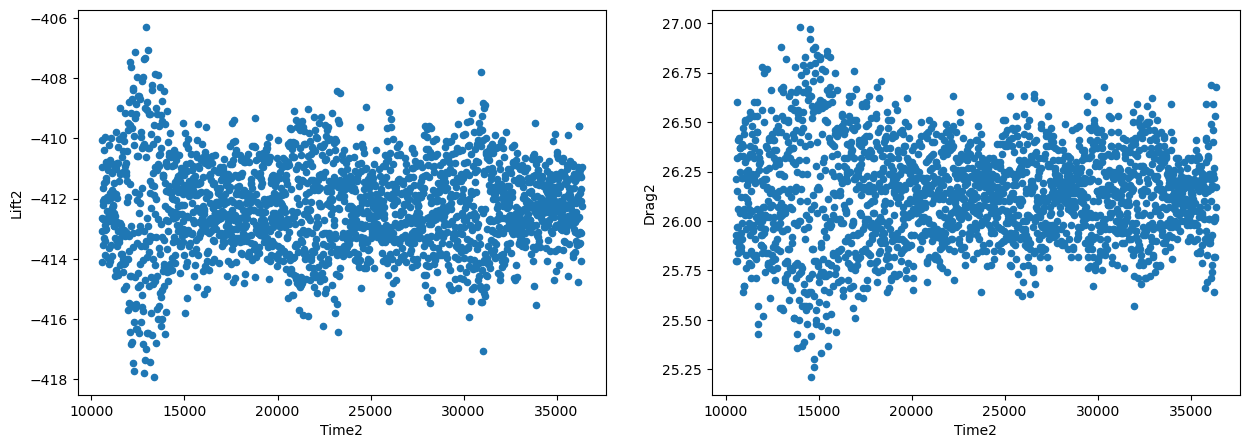

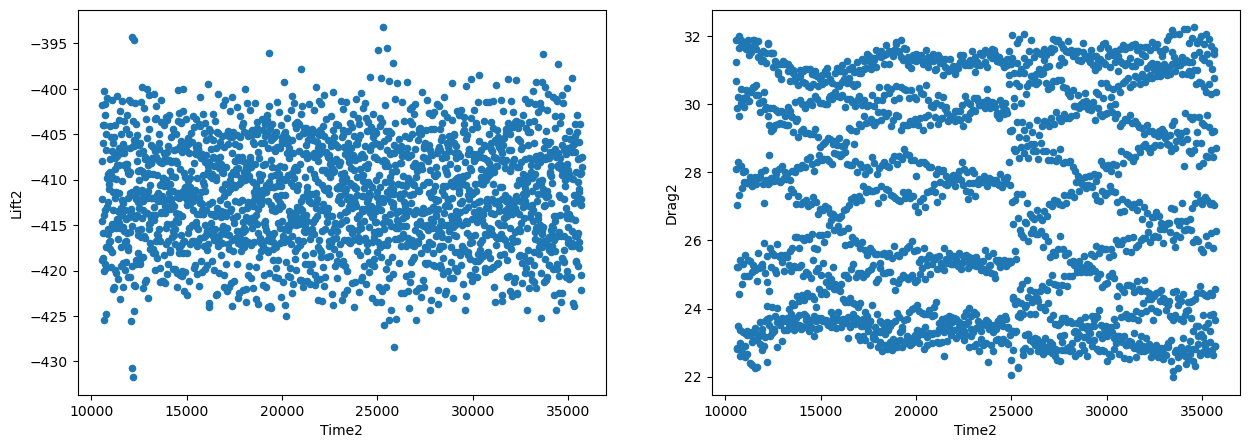

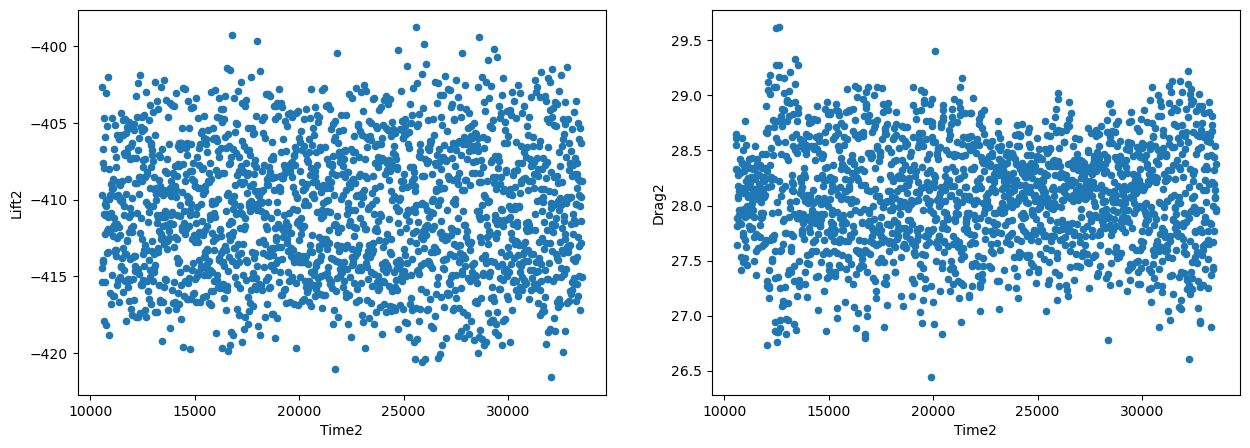

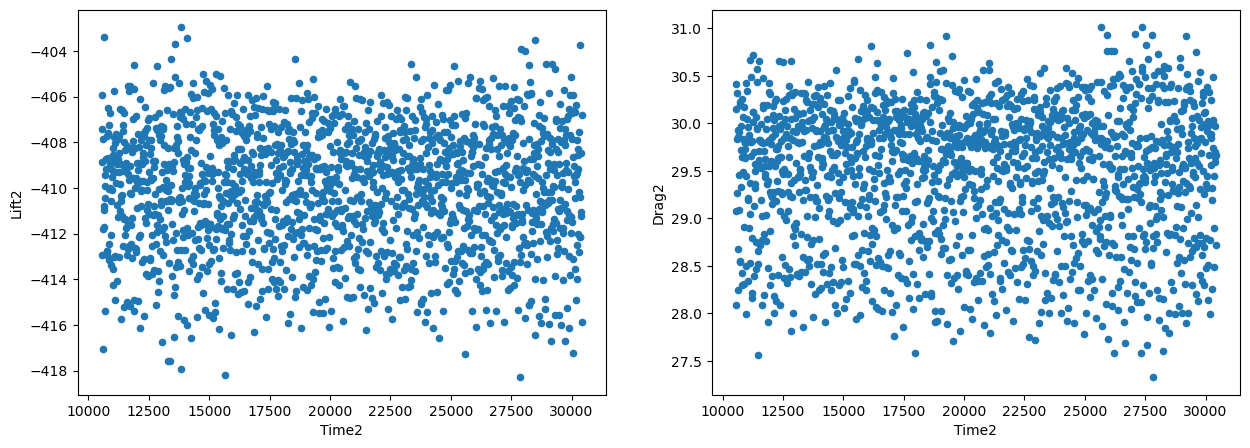

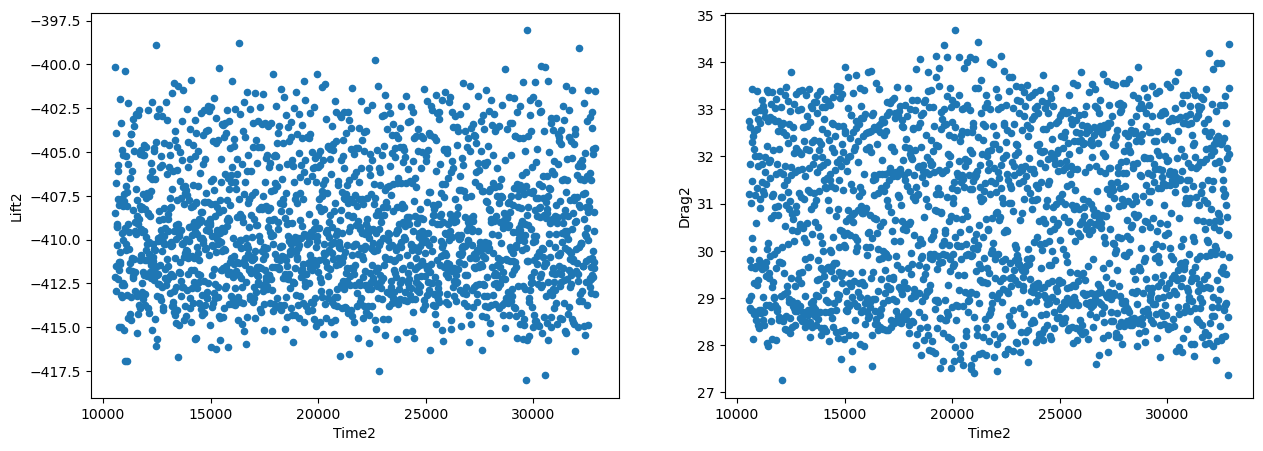

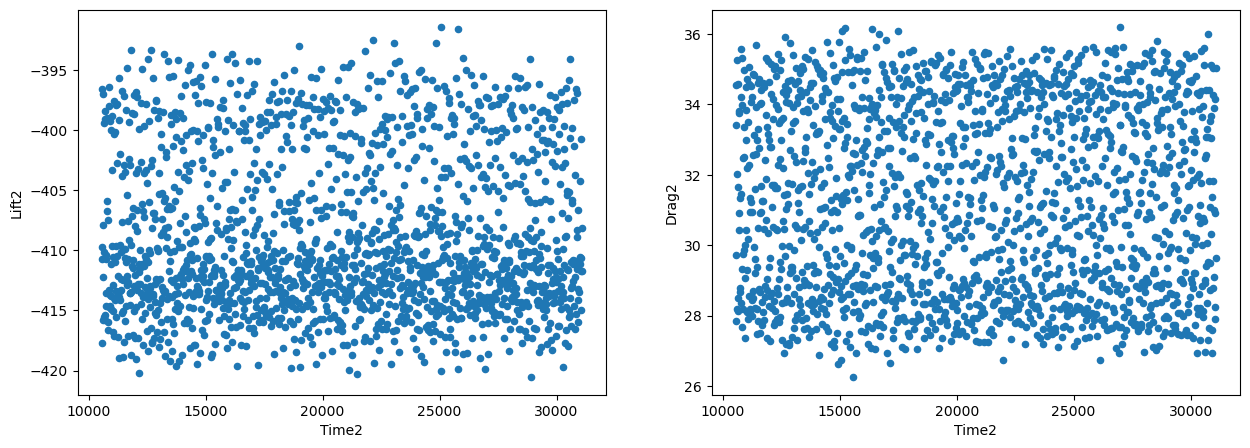

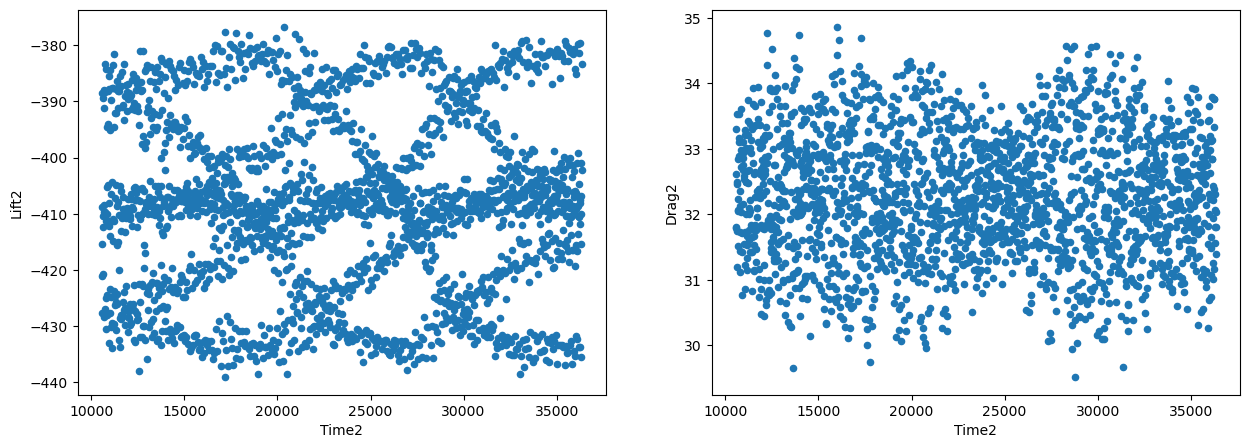

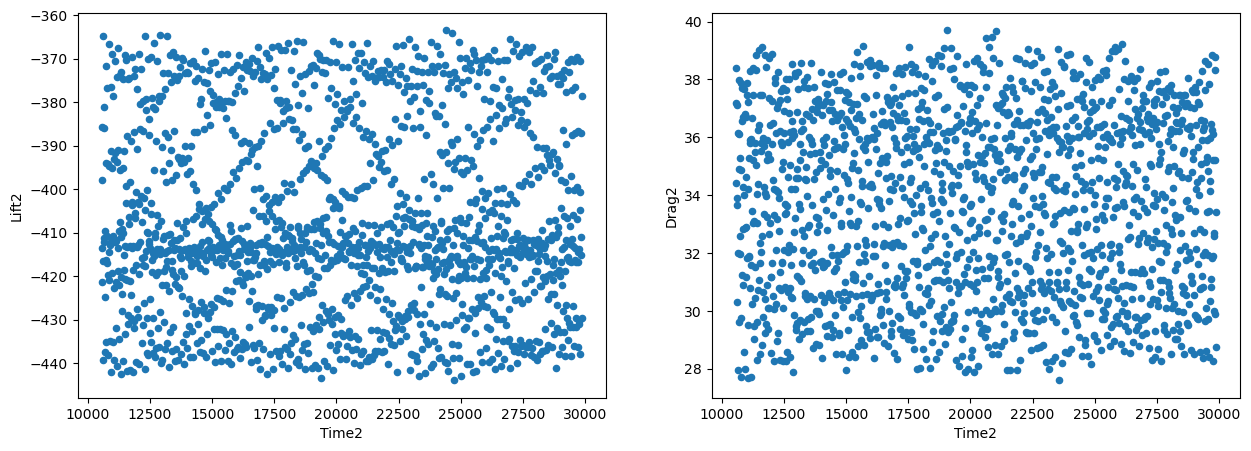

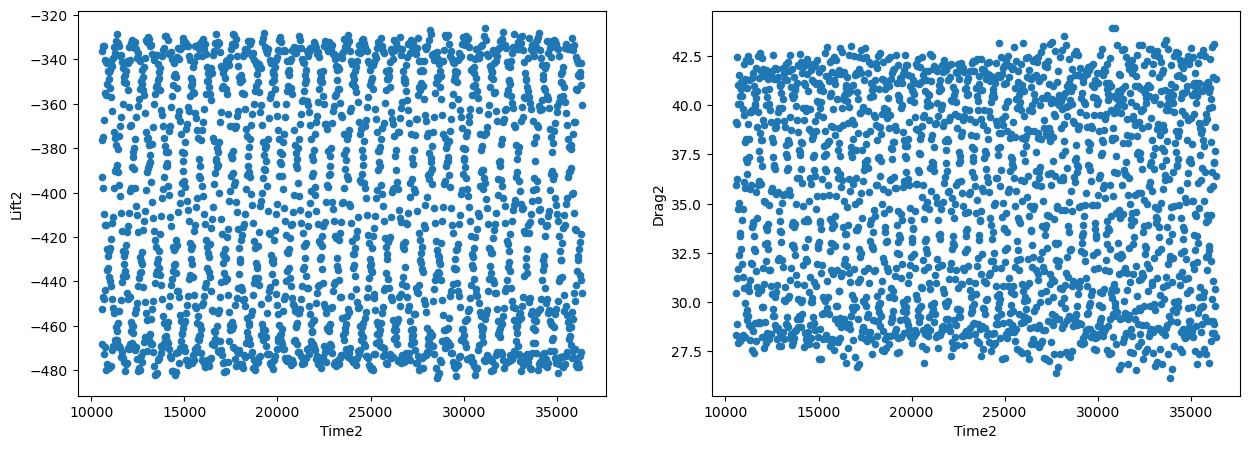

In [24]:
# en calibrationData va el nombre del archivo que 
CDfile = "CD2.txt"
CDData=open(CDfile,"w")
#CDData.write('txt,Media Lift,Media Drag,STD Lift,STD Drag\n');
CDData.write('txt,MediaLift,MediaDrag\n');

RawDataFolder = "Raw Dataa/"
files = np.sort(glob.glob(RawDataFolder+'*.txt'))
VoltajeMedicion=[]
VelocidadMedicion=[]
ReMedicion=[]
for i in files:
    item=i.strip("Raw Dataa\\V")
    item=item.strip(".txt")
    item=item.strip("")
    VoltajeMedicion.append(float(item))
    Vitem=PolinomioVelocidad[0]*float(item)+PolinomioVelocidad[1]
    VelocidadMedicion.append(Vitem)
    ReMedicion.append(Vitem*D*rho/mu)
    
Inicial= {
    "Voltaje" : VoltajeMedicion,
    "Velocidad" : VelocidadMedicion,
    "Re" : ReMedicion,
    }
DFInicial2 = pd.DataFrame(Inicial)

for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos[:-100]
    datos.columns = ["Lift2", "Drag2", "Time2"]
    datos = datos.astype(float)
    datos=datos[800:3000]
    mediaLift=datos["Lift2"].mean()
    stdLift=datos["Lift2"].std()
    mediaDrag=(datos["Drag2"].mean())
    stdDrag=(datos["Drag2"].std())
    df=datos
    
    for i in df.index:
        if df["Lift2"][i]>(mediaLift+4*stdLift):
            df["Lift2"][i]=np.nan
        if df["Lift2"][i]<(mediaLift-4*stdLift):
            df["Lift2"][i]=np.nan
        if df["Drag2"][i]>(mediaDrag+4*stdDrag):
            df["Drag2"][i]=np.nan
        if df["Drag2"][i]<(mediaDrag-4*stdDrag):
            df["Drag2"][i]=np.nan
    mediaLift=datos["Lift2"].mean()
    stdLift=datos["Lift2"].std()
    mediaDrag=datos["Drag2"].mean()
    stdDrag=datos["Drag2"].std()   
    
    for i in df.index:
        if df["Lift2"][i]>(mediaLift+4*stdLift):
            df["Lift2"][i]=np.nan
        if df["Lift2"][i]<(mediaLift-4*stdLift):
            df["Lift2"][i]=np.nan
        if df["Drag2"][i]>(mediaDrag+4*stdDrag):
            df["Drag2"][i]=np.nan
        if df["Drag2"][i]<(mediaDrag-4*stdDrag):
            df["Drag2"][i]=np.nan
    mediaLift=datos["Lift2"].mean()
    stdLift=datos["Lift2"].std()
    mediaDrag=datos["Drag2"].mean()
    stdDrag=datos["Drag2"].std()   
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    df.plot.scatter(ax=axes[0],x="Time2", y="Lift2")
    df.plot.scatter(ax=axes[1],x="Time2", y="Drag2")
    fig.savefig(k+".png", dpi=100)
    
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    #CDData.write(i+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
    CDData.write(str(k)+","+str(mediaLift)+","+str(mediaDrag)+"\n")
    
CDData.close()
DFFinal2=pd.read_csv(CDfile)
DFFinal2

In [25]:
DatosCD=pd.concat([DFFinal,DFInicial],axis =1)
DatosCD2=pd.concat([DFFinal2,DFInicial2],axis =1)

In [26]:
## Tomo la referencia y la borro del original


Referencia=DatosCD[:1]
Drag0=Referencia["MediaDrag"][0]
Lift0=Referencia["MediaLift"][0]
DatosCD=DatosCD.drop([0]) 


Referencia2=DatosCD2[:1]
Drag02=Referencia2["MediaDrag"][0]
Lift02=Referencia2["MediaLift"][0]
DatosCD2=DatosCD2.drop([0]) 

In [27]:
### Uso la referencia para poner en 0 todo
DatosCD["Drag"]= DatosCD["MediaDrag"]-Drag0
DatosCD["Lift"]= DatosCD["MediaLift"]-Lift0

DatosCD2["Drag"]= DatosCD2["MediaDrag"]-Drag02
DatosCD2["Lift"]= DatosCD2["MediaLift"]-Lift02

In [28]:
DatosCD["Drag"]= DatosCD["Drag"]-DatosCD2["Drag"]
DatosCD["Lift"]= DatosCD["Lift"]-DatosCD2["Lift"]

In [29]:
#limpio los datos que ya no me sirven

DatosCD=DatosCD.drop("txt", axis=1)
DatosCD=DatosCD.drop("MediaDrag", axis=1)
DatosCD=DatosCD.drop("MediaLift", axis=1)

In [33]:
DatosCD["CD"]=DatosCD["Drag"]*0.00980665/(0.5*A*rho*DatosCD["Velocidad"]*DatosCD["Velocidad"])
DatosCD["CL"]=DatosCD["Lift"]*0.00980665/(0.5*A*rho*DatosCD["Velocidad"]*DatosCD["Velocidad"])

In [34]:
DatosCD

,Voltaje,Velocidad,Re,Drag,Lift,CD,CL
1,11.12,0.897505,2826.292037,0.355654,0.866523,0.424790,1.034968
2,15.65,1.312029,4131.651214,1.267287,1.274268,0.708286,0.712188
3,22.24,1.915057,6030.617435,3.311634,3.130274,0.868760,0.821183
4,27.76,2.420172,7621.253783,5.956966,4.510355,0.978483,0.740865
5,33.96,2.987512,9407.838087,9.755468,7.217426,1.051597,0.778007
6,38.40,3.393801,10687.262976,12.707577,9.186555,1.061477,0.767363
7,40.40,3.576813,11263.580494,14.950969,10.398993,1.124339,0.782023
8,42.20,3.741525,11782.266259,15.929458,11.315611,1.094774,0.777681
9,45.80,4.070948,12819.637791,19.592252,13.530952,1.137402,0.785521
10,49.70,4.427823,13943.456950,23.350622,16.234008,1.145878,0.796647


<AxesSubplot:xlabel='Re', ylabel='CD'>

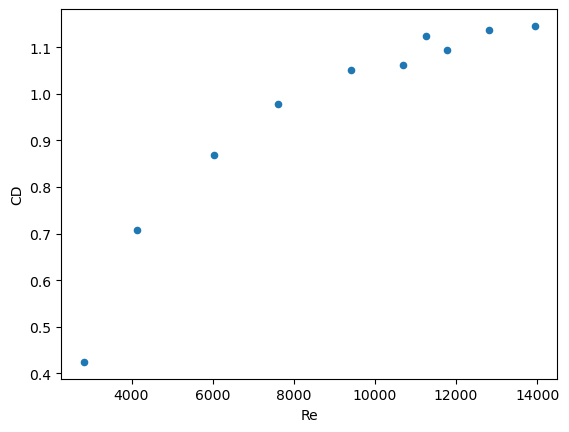

In [35]:
DatosCD.plot.scatter(x="Re", y="CD")